<a href="https://colab.research.google.com/github/NhaBaodang/KT_AI/blob/main/ban_tay.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

from keras.optimizers import SGD, RMSprop
from keras.models import Sequential, load_model
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.utils import np_utils, to_categorical, load_img, img_to_array
from keras.layers import Dense, Activation, Dropout, Conv2D, MaxPooling2D, Flatten, LeakyReLU

from sklearn import preprocessing
from sklearn.utils import validation
from sklearn.model_selection import train_test_split

In [ ]:
data="/content/drive/MyDrive/Ban_tay/"

In [ ]:
Data = ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)
Train = Data.flow_from_directory(data, target_size=(150,150),batch_size=32, class_mode='categorical')
Train.class_indices

Found 62 images belonging to 4 classes.


{'Co_don': 0, 'Giau_sang': 1, 'Hanh_phuc': 2, 'Kho': 3}

In [ ]:
model=Sequential()
model.add(Conv2D(32,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same',input_shape=(150,150,3))) 
model.add(MaxPooling2D(2,2))
model.add(Conv2D(64,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same')) 
model.add(MaxPooling2D(2,2))
model.add(Conv2D(128,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same')) 
model.add(MaxPooling2D(2,2))
model.add(Flatten())
model.add(Dense(256,activation='relu',kernel_initializer='he_uniform'))
model.add(Dropout(0.2))
model.add(LeakyReLU(alpha=0.1))
model.add(Dense(4,activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 150, 150, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 75, 75, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 75, 75, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 37, 37, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 37, 37, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 18, 18, 128)      0

In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
train=model.fit(Train, epochs=50, batch_size=256, verbose=1)

Epoch 1/50
2/2 [==============================] - 22s 8s/step - loss: 15.0196 - accuracy: 0.2258
Epoch 2/50
2/2 [==============================] - 3s 1s/step - loss: 23.5083 - accuracy: 0.3226
Epoch 3/50
2/2 [==============================] - 3s 1s/step - loss: 4.7882 - accuracy: 0.4194
Epoch 4/50
2/2 [==============================] - 3s 2s/step - loss: 1.5692 - accuracy: 0.5000
Epoch 5/50
2/2 [==============================] - 3s 1s/step - loss: 1.2380 - accuracy: 0.4355
Epoch 6/50
2/2 [==============================] - 3s 1s/step - loss: 0.9217 - accuracy: 0.6935
Epoch 7/50
2/2 [==============================] - 3s 1s/step - loss: 0.6501 - accuracy: 0.9032
Epoch 8/50
2/2 [==============================] - 4s 2s/step - loss: 0.5041 - accuracy: 0.8548
Epoch 9/50
2/2 [==============================] - 3s 1s/step - loss: 0.3622 - accuracy: 0.8871
Epoch 10/50
2/2 [==============================] - 3s 1s/step - loss: 0.2683 - accuracy: 0.9032
Epoch 11/50
2/2 [=============================

In [ ]:
Score=model.evaluate(Train,verbose=0)
print('Hàm Mất Mát Trên Tập Kiểm Tra : ', Score[0])
print('Độ Chính Xác Trên Tập Kiểm Tra : ', Score[1])

Hàm Mất Mát Trên Tập Kiểm Tra :  0.0008606835617683828
Độ Chính Xác Trên Tập Kiểm Tra :  1.0


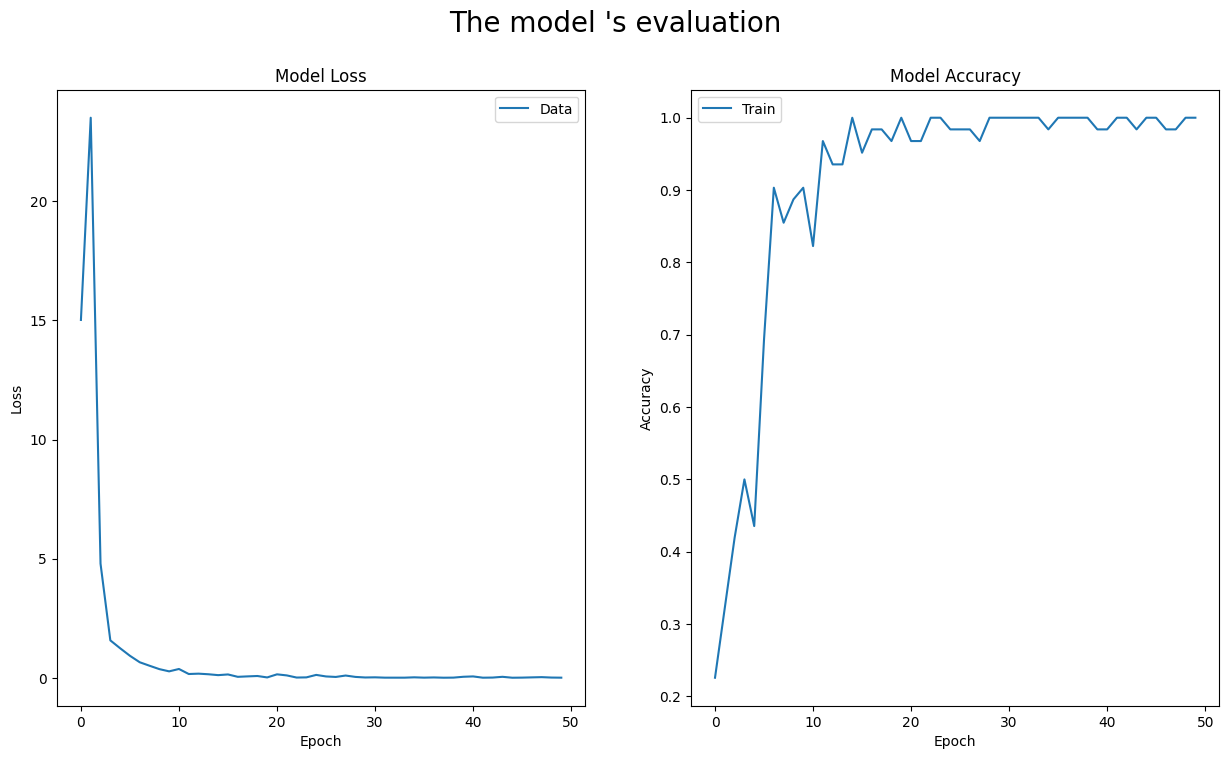

In [ ]:
fig,axes = plt.subplots(1,2, figsize=(15,8))
fig.suptitle("The model 's evaluation ",fontsize=20)

axes[0].plot(train.history['loss'])
axes[0].set_title('Model Loss')
axes[0].set_ylabel('Loss')
axes[0].set_xlabel('Epoch')
axes[0].legend(['Data'])

axes[1].plot(train.history['accuracy'])
axes[1].set_title('Model Accuracy')
axes[1].set_ylabel('Accuracy')
axes[1].set_xlabel('Epoch')
axes[1].legend(['Train'])
plt.show()

In [ ]:
model.save('/content/drive/MyDrive/ban_tay.h5')

In [ ]:
model_1 = load_model('/content/drive/MyDrive/ban_tay.h5')

1/1 [==============================] - 0s 286ms/step
Đây là : Hạnh Phúc


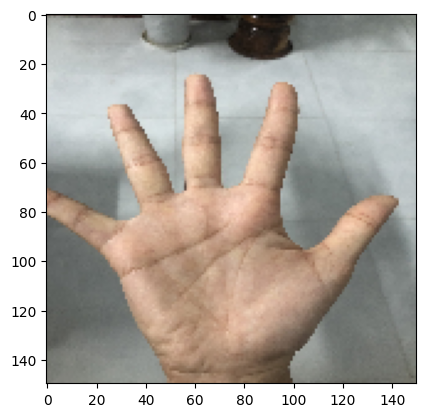

1/1 [==============================] - 0s 18ms/step
Đây là : Giàu Sang


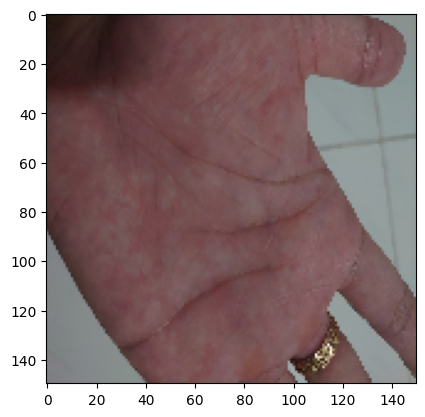

1/1 [==============================] - 0s 18ms/step
Đây là : Cực Khổ


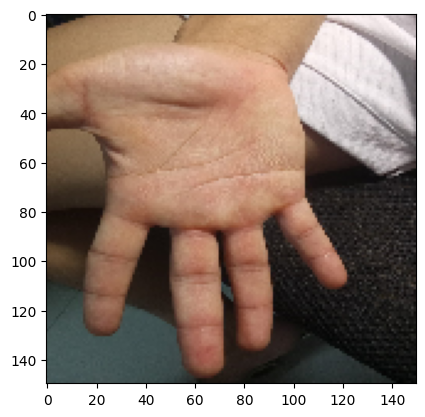

1/1 [==============================] - 0s 22ms/step
Đây là : Cô Đơn


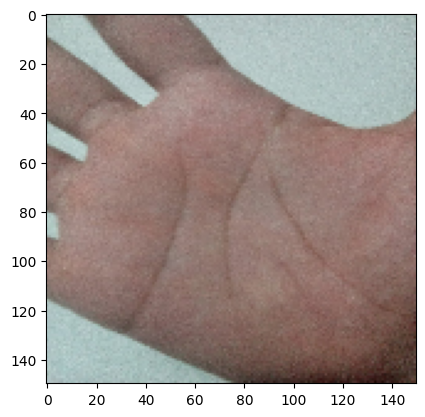

In [ ]:
folder='/content/drive/MyDrive/Test_ban_tay/'
for i in os.listdir(folder):
  img=load_img(folder+i, target_size=(150,150))
  plt.imshow(img)
  img=img_to_array(img)
  img=img.astype('float32')
  img=img/255
  img=np.expand_dims(img,axis=0)
  result=(model_1.predict(img).argmax())
  class_name=['Cô Đơn', 'Giàu Sang', 'Hạnh Phúc', 'Cực Khổ']
  print('Đây là : {}'.format(class_name[result]))
  plt.show()